<a href="https://colab.research.google.com/github/APstats-labs/labs/blob/main/SA_C9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Distributions

General requirements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv
from scipy.stats import binom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

## Distributions (II)

### Hypergeometric distribution

Imagine repeatedly drawing from an urn with different colored balls (without putting them back) and asking what the percentage is of drawing a black ball.

If you were to put the balls back, it would follow a binomial distribution.

The resulting distribution of outcomes depends on three parameters: the probability of the outcome (black), the number of repetitions (draws), and, unlike the binomial, the total size of the population.

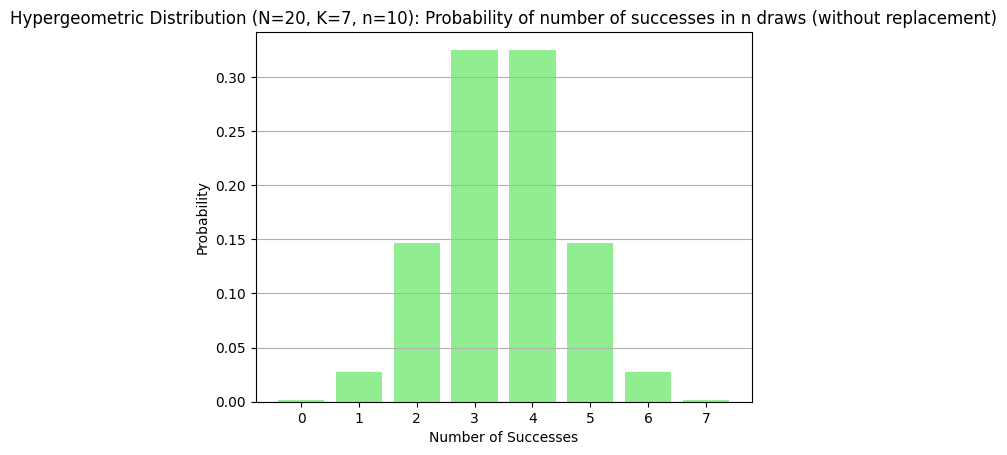

In [ ]:

# Parameters for the hypergeometric distribution
k = 7    # Total number of balls of black color
N = 20   # Total number of balls
n = 10   # Number repetitions/drawings



# Define the range of outcomes
x = np.arange(0, k+1)  #from getting no black balls to getting all the black balls

# Calculate the PMF for each outcome
pmf = hypergeom.pmf(x, N, k, n)

# Plot the PMF
plt.bar(x, pmf, color='lightgreen')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Hypergeometric Distribution (N={N}, K={k}, n={n}): Probability of number of successes in n draws (without replacement)')
plt.grid(axis='y')
plt.show()


#### **Distinction from a binomial**

❗Notice that the hypergeometric distribution has less variance. If early draws result in many successes, subsequent draws are less likely to yield additional successes because the pool of remaining successes becomes smaller. This introduces a natural constraint that reduces variability.  


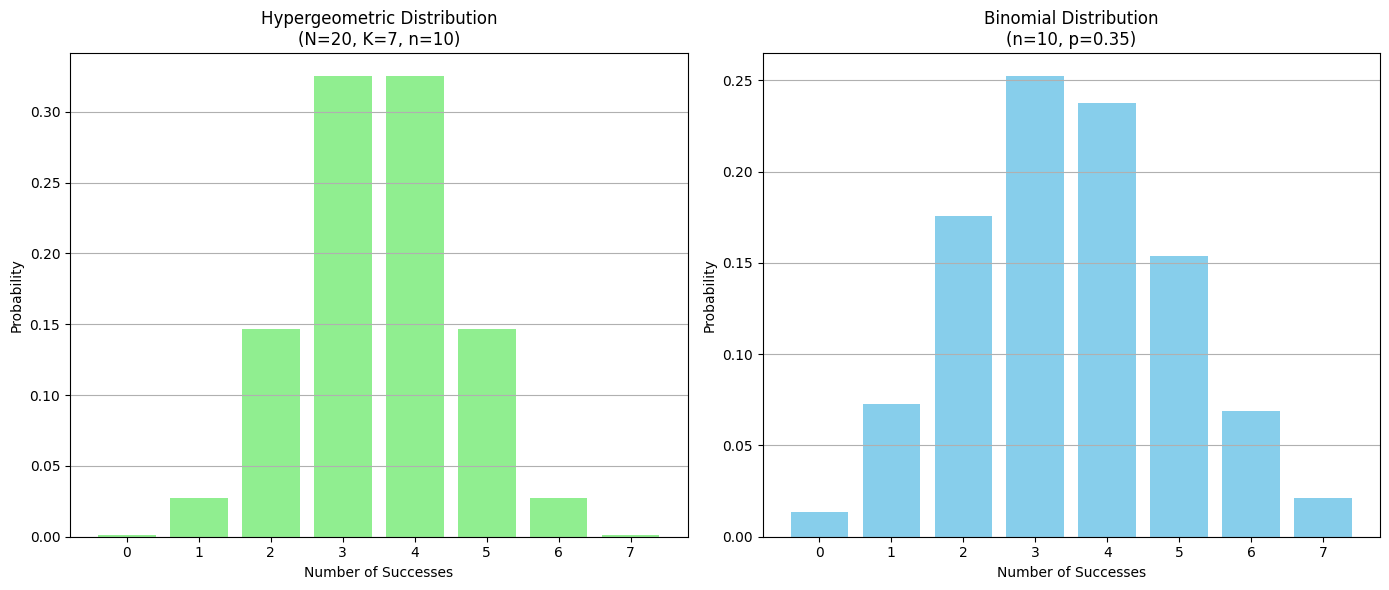

In [ ]:
# Parameters for the hypergeometric distribution
k = 7    # Total number of balls of black color
N = 20   # Total number of balls
n = 10   # Number repetitions/drawings

# Parameters for the binomial distribution
p = k / N  # Probability of success in each trial

# Define the range of outcomes
x = np.arange(0, k+1)

# Calculate the PMF for the hypergeometric distribution
pmf_hypergeom = hypergeom.pmf(x, N, k, n)

# Calculate the PMF for the binomial distribution
pmf_binom = binom.pmf(x, n, p)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the PMF of the hypergeometric distribution
ax1.bar(x, pmf_hypergeom, color='lightgreen')
ax1.set_xlabel('Number of Successes')
ax1.set_ylabel('Probability')
ax1.set_title(f'Hypergeometric Distribution\n(N={N}, K={k}, n={n})')
ax1.grid(axis='y')

# Plot the PMF of the binomial distribution
ax2.bar(x, pmf_binom, color='skyblue')
ax2.set_xlabel('Number of Successes')
ax2.set_ylabel('Probability')
ax2.set_title(f'Binomial Distribution\n(n={n}, p={p:.2f})')
ax2.grid(axis='y')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Poisson Distribution

Imagine customers arriving at an airport within an hour. By observing arrivals over multiple hours, you can compute the average number of arrivals per hour.

Similarly, imagine counting the number of mistakes in a book. By examining multiple books, you can compute the average number of mistakes per book.

The resulting distribution of outcomes depends on a single parameter: lambda.

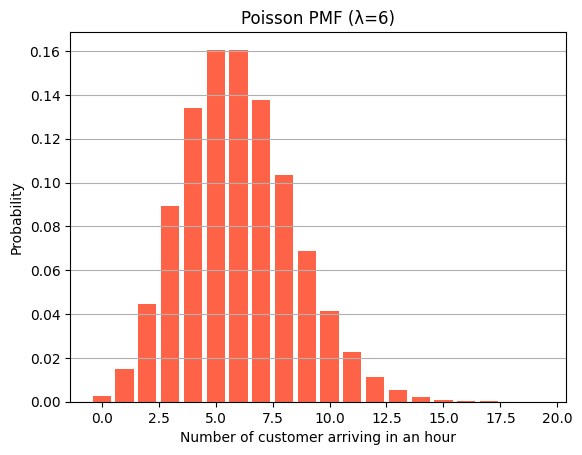

In [ ]:
# Set the parameter for the Poisson distribution
lambda_ = 6  # average rate (mean)

# Create an array of discrete values and calculate the PMF
x_axline = np.arange(0, 20)  # Range of values
pmf_poisson = poisson.pmf(x_axline, lambda_)

# Plot the PMF using a bar plot
plt.bar(x_axline, pmf_poisson, color='tomato')
plt.xlabel('Number of customer arriving in an hour')
plt.ylabel('Probability')
plt.title(f'Poisson PMF (λ={lambda_})')
plt.grid(axis='y')
plt.show()


❗A useful property of the Poisson distribution is that its mean and variance are equal

#### **Distinction from Exponential and Gamma**


❗Notice that the Y-axis, despite representing a probability measure, can have values greater than 1. This is because, for continuous distributions, the Y-axis represents probability density, not just probability.

Here are some attempts to explain the difference. The one involving the Pope is my favorite: https://www.reddit.com/r/explainlikeimfive/comments/q73d7w/eli5_why_probability_density_can_be_1/

The exponential distribution assigns probabilities to the time intervals before the next arrival. For example, if we integrate over an interval on the x-axis (say, between 0.02 and 0.03), we obtain the probability that the next customer will arrive between 0.02 and 0.03 hours.

Similarly, we can use the exponential distribution to calculate the probability of finding a mistake in the 0.02–0.03 section of a book.

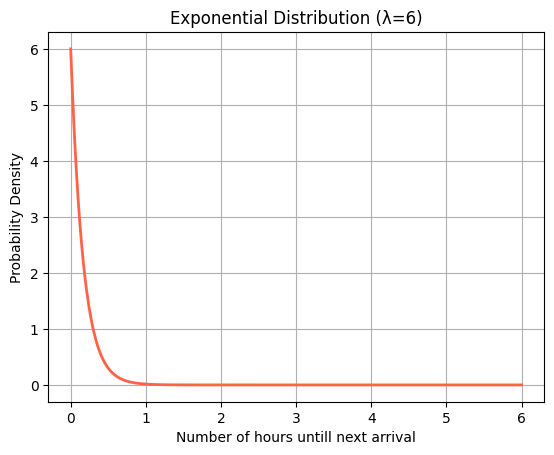

In [ ]:
lambda_ = 6

# Create a range of values for the PDF
x_ax_exp = np.linspace(0, 6, 1000)
pdf_exp = expon.pdf(x_ax_exp, scale=1 / lambda_)

# Plot the Exponential PDF
plt.plot(x_ax_exp, pdf_exp, 'tomato', lw=2, label='Theoretical PDF')

plt.xlabel('Number of hours untill next arrival')
plt.ylabel('Probability Density')
plt.title(f'Exponential Distribution (λ={lambda_})')
plt.grid(True)
plt.show()


We can also consider the probability of a certain amount of time or space passing before two events occur. This involves summing two independent exponential random variables with the same rate parameter (λ).

The resulting distribution is the gamma distribution (known as the Erlang distribution when the shape parameter is an integer).

The exponential distribution is a special case of the gamma distribution, where we calculate the time passing before a single event occurs.

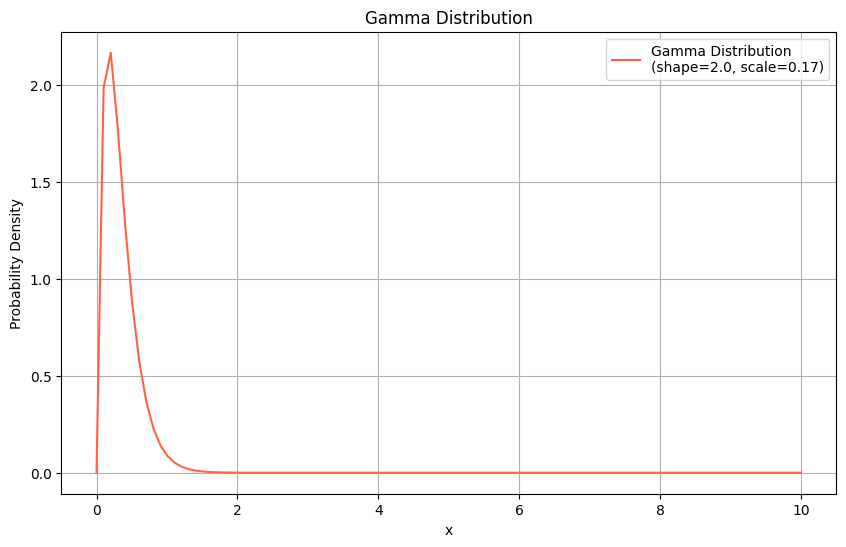

In [ ]:
lambda_ = 6

# Step 2: Define Parameters
shape = 2.0  # Shape parameter (k) number of kth events
scale = 1 / lambda_  # Scale parameter (theta) 1/Rate
x = np.linspace(0, 10, 100)  # Range of x values

# Step 3: Calculate PDF
pdf = gamma.pdf(x, a=shape, scale=scale)

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'tomato', label=f'Gamma Distribution\n(shape={shape}, scale={round(scale,2)})')
plt.title('Gamma Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


#### **Approximation of binomial using Poisson**

Notice that by using the parameters of the binomial distribution (from the airflight example), we can approximate the same distribution with the Poisson distribution.

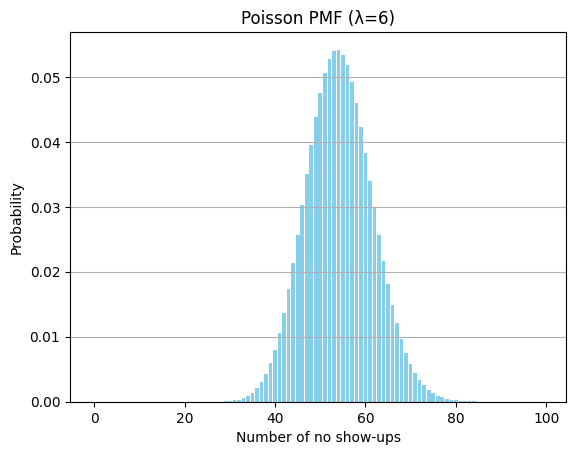

In [ ]:
# Set the parameter for the Poisson equal to n*p from binomial
lambda_aprox = 452*0.12  # average rate (mean)

# Create an array of discrete values and calculate the PMF
x_axline_aprox = np.arange(0, 100)  # Range of values
pmf_poisson_aprox = poisson.pmf(x_axline_aprox, lambda_aprox)

# Plot the PMF using a bar plot
plt.bar(x_axline_aprox, pmf_poisson_aprox, color='skyblue')
plt.xlabel('Number of no show-ups')
plt.ylabel('Probability')
plt.title(f'Poisson PMF (λ={lambda_})')
plt.grid(axis='y')
plt.show()

Notice tha the extremness is close (it was 0.005 when using the binomial)

In [ ]:
poisson.cdf(37, lambda_aprox)

0.008560903917645633

### Uniform Distribution

Imagine rolling a 12-sided die.

Imagine drawing a number between 1 and 12 with arbitrarily many decimal places.

In both cases, each number has an equal chance of being selected.

The resulting distribution depends on two parameters: the minimum value (min) and the maximum value (max).  However, it can be continous or discrete.

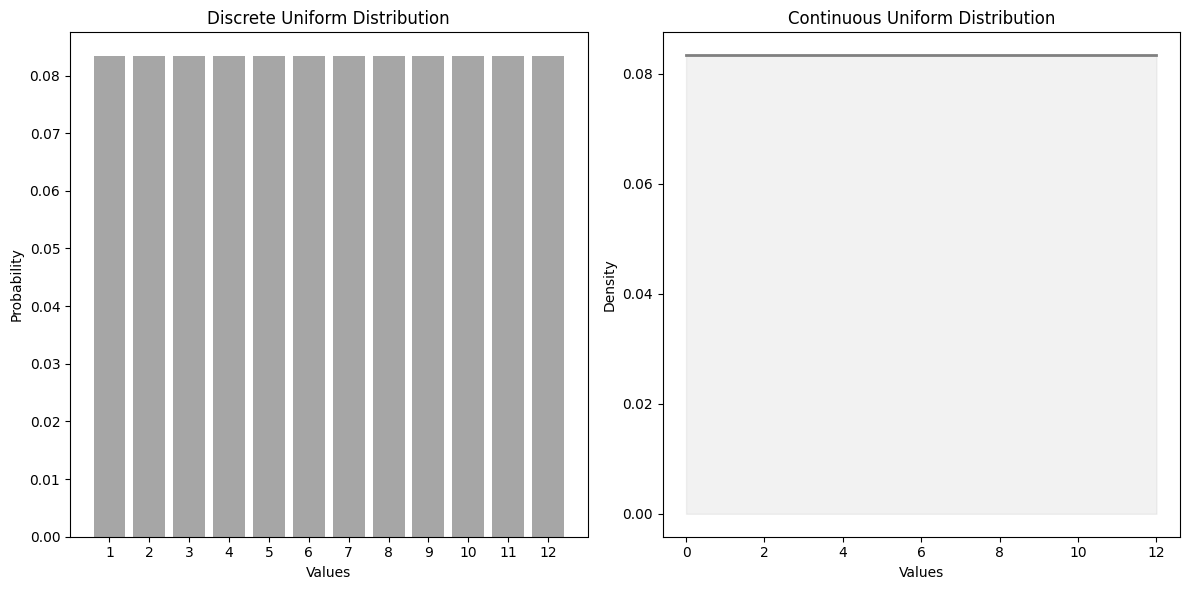

In [ ]:
# Set up the figure
plt.figure(figsize=(12, 6))

# 1. Discrete Uniform Distribution
plt.subplot(1, 2, 1)
# Define the range of the discrete distribution
low, high = 1, 12
x_discrete = np.arange(low, high + 1)
y_discrete = np.ones_like(x_discrete) / len(x_discrete)  # Equal probability for each outcome

plt.bar(x_discrete, y_discrete, color='grey', alpha=0.7)
plt.title('Discrete Uniform Distribution')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.xticks(x_discrete)

# 2. Continuous Uniform Distribution
plt.subplot(1, 2, 2)
# Define the parameters for the continuous distribution
a, b = 0, 12  # The range [a, b]
x_continuous = np.linspace(a, b, 1000)
y_continuous = uniform.pdf(x_continuous, loc=a, scale=b - a)  # PDF of continuous uniform distribution

plt.plot(x_continuous, y_continuous, color='grey', lw=2)
plt.fill_between(x_continuous, y_continuous, color='grey', alpha=0.1)
plt.title('Continuous Uniform Distribution')
plt.xlabel('Values')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


❗A useful property of the uniform distribution is that its mean is (a+b)/2 and that the variance is [(b-a+1)^2-1]/2 (in the discrete case) and (b-a)^2/2 (in the continous case)

### Normal Distribution (Gaussian)

Imagine measuring heights. These measurements will tend to follow a normal distribution.

The resulting distribution of outcomes depends on two parameters: the mean and the standard deviation.

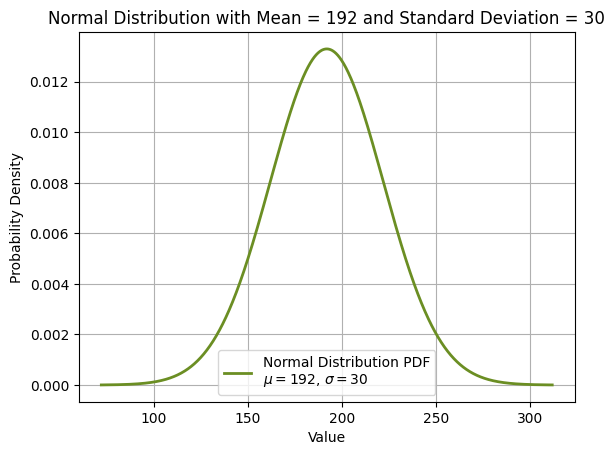

In [ ]:
# Parameters for the normal distribution
mu = 192      # Mean of the normal distribution
sigma = 30    # Standard deviation of the normal distribution

# Create an array of values from mean - 4*sigma to mean + 4*sigma
x_normal = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Compute the PDF for the normal distribution
pdf = norm.pdf(x_normal, loc=mu, scale=sigma)

# Plot the PDF of the normal distribution
plt.plot(x_normal, pdf, 'olivedrab', lw=2, label=f'Normal Distribution PDF\n$\mu={mu}$, $\sigma={sigma}$')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title(f'Normal Distribution with Mean = {mu} and Standard Deviation = {sigma}')
plt.legend()
plt.grid(True)
plt.show()


#### **CLT - approximation of binomial**

Normal distributions emerge when a large number of identically distributed random variables are added together (n→∞).

In the example below, we add 1000 Bernoulli random variables (which is a binomial distribution with many trials)

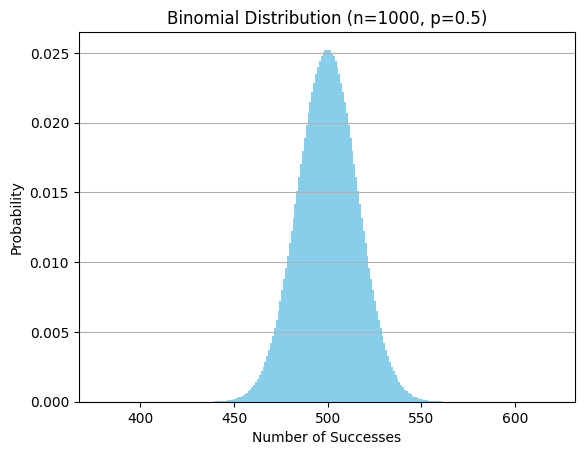

In [ ]:
# Parameters for the binomial distribution
n_approximate = 1000   # Number of trials
p_approximate = 0.5  # Probability of success

# Define the range of outcomes
x_approximate = np.arange(380, 620)
# Calculate the PMF for each outcome
pmf_approximate = binom.pmf(x_approximate, n_approximate, p_approximate)

# Plot the PMF
plt.bar(x_approximate, pmf_approximate, color='skyblue',width=1.5)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n={n_approximate}, p={p_approximate})')
plt.grid(axis='y')
plt.show()


As can be observed, the parameters of the binomial can be used to generate a normal distribution **with similar moments** (center, shape etc.)

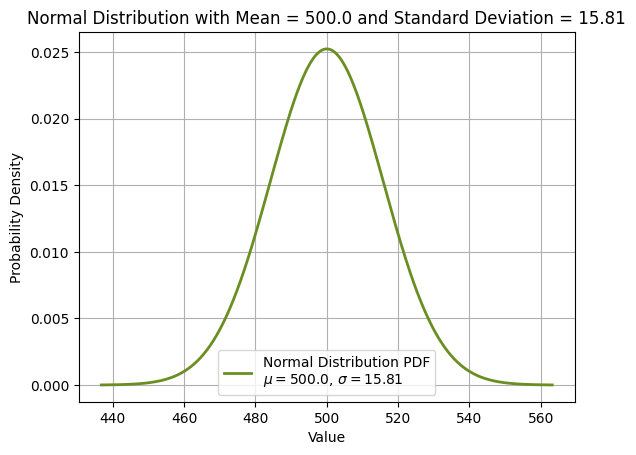

In [ ]:
# Parameters for the normal distribution
mu_approximate = n_approximate*p_approximate     # Mean of the normal distribution
sigma_approximate = np.sqrt(n_approximate*p_approximate*(1-p_approximate))    # Standard deviation of the normal distribution

# Create an array of values from mean - 4*sigma to mean + 4*sigma
x_aprox = np.linspace(mu_approximate - 4*sigma_approximate, mu_approximate + 4*sigma_approximate, 1000)

# Compute the PDF for the normal distribution
pdf_aprox = norm.pdf(x_aprox, loc=mu_approximate, scale=sigma_approximate)

# Plot the PDF of the normal distribution
plt.plot(x_aprox, pdf_aprox, 'olivedrab', lw=2, label=f'Normal Distribution PDF\n$\mu={mu_approximate}$, $\sigma={round(sigma_approximate,2)}$')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title(f'Normal Distribution with Mean = {mu_approximate} and Standard Deviation = {round(sigma_approximate,2)}')
plt.legend()
plt.grid(True)
plt.show()

#### **CLT - sampling distribution of the sample mean**

The normal distribution also emerges as we draw random samples from a population and compute the mean.

In [ ]:
# Create three different populations with different distributions
np.random.seed(42)  # For reproducibility

# Population 1: Uniform Distribution
population_uniform = np.random.uniform(0, 10, 10000)

# Population 2: Normal Distribution
population_normal = np.random.normal(50, 15, 10000)

# Population 3: Exponential Distribution
population_exponential = np.random.exponential(5, 10000)

In [ ]:
# Define the sample_and_mean function as given
def sample_and_mean(population, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, sample_size)  # Randomly sample from the population
        sample_means.append(np.mean(sample))  # Calculate the mean and store
    return sample_means

In [ ]:

# Parameters for sampling
sample_size = 50  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Generate the sampling distributions
means_uniform = sample_and_mean(population_uniform, sample_size, num_samples)
means_normal = sample_and_mean(population_normal, sample_size, num_samples)
means_exponential = sample_and_mean(population_exponential, sample_size, num_samples)

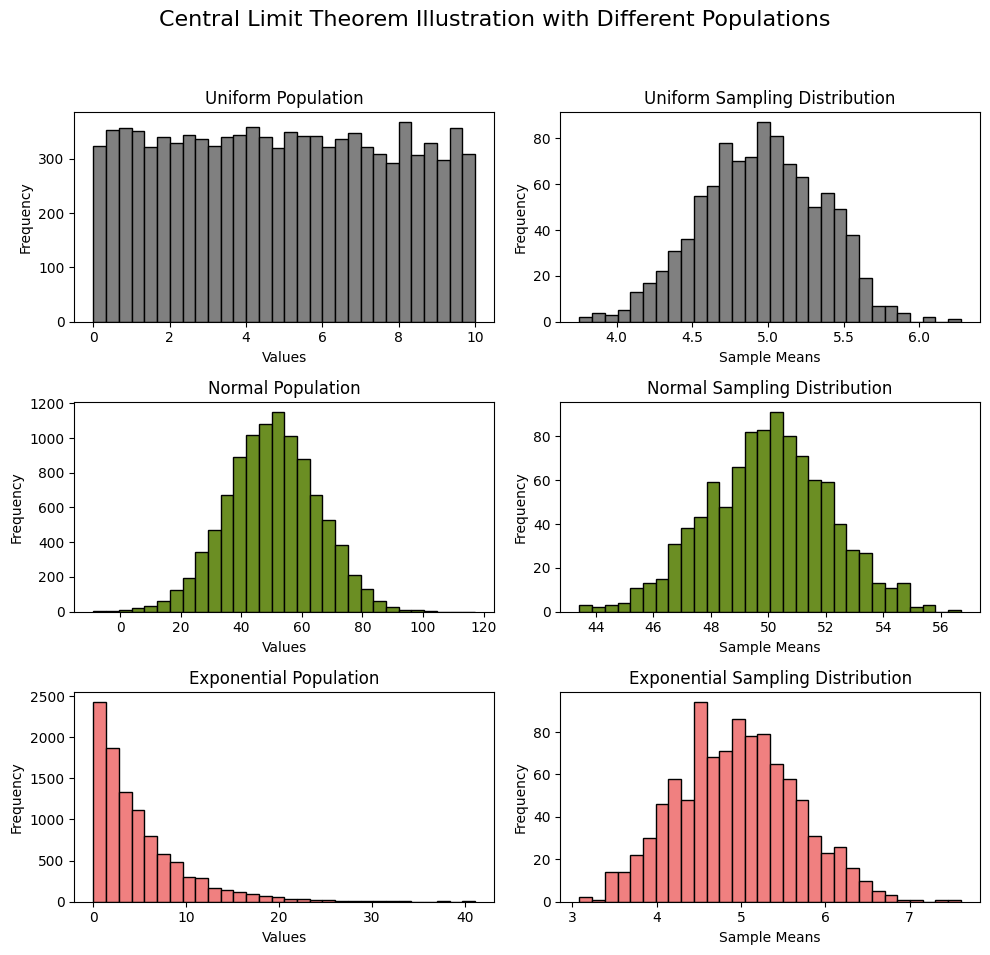

In [ ]:
# Set up the plots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Central Limit Theorem Illustration with Different Populations', fontsize=16)

# Plot for Uniform Distribution
# Original population distribution (top)
axs[0, 0].hist(population_uniform, bins=30, color='grey', edgecolor='black')
axs[0, 0].set_title('Uniform Population')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Frequency')

# Sampling distribution (bottom)
axs[0, 1].hist(means_uniform, bins=30, color='grey', edgecolor='black')
axs[0, 1].set_title('Uniform Sampling Distribution')
axs[0, 1].set_xlabel('Sample Means')
axs[0, 1].set_ylabel('Frequency')

# Plot for Normal Distribution
# Original population distribution (top)
axs[1, 0].hist(population_normal, bins=30, color='olivedrab', edgecolor='black')
axs[1, 0].set_title('Normal Population')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Frequency')

# Sampling distribution (bottom)
axs[1, 1].hist(means_normal, bins=30, color='olivedrab', edgecolor='black')
axs[1, 1].set_title('Normal Sampling Distribution')
axs[1, 1].set_xlabel('Sample Means')
axs[1, 1].set_ylabel('Frequency')

# Plot for Exponential Distribution
# Original population distribution (top)
axs[2, 0].hist(population_exponential, bins=30, color='lightcoral', edgecolor='black')
axs[2, 0].set_title('Exponential Population')
axs[2, 0].set_xlabel('Values')
axs[2, 0].set_ylabel('Frequency')

# Sampling distribution (bottom)
axs[2, 1].hist(means_exponential, bins=30, color='lightcoral', edgecolor='black')
axs[2, 1].set_title('Exponential Sampling Distribution')
axs[2, 1].set_xlabel('Sample Means')
axs[2, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### **LLN - sampling distribution of the sample mean**

Also, notice that the higher the sample size, the more concentrated the estimations will be around the true mean. This is a consequence of the law of large numbers, which essentially states that the sample average converges to the true mean as the sample size increases

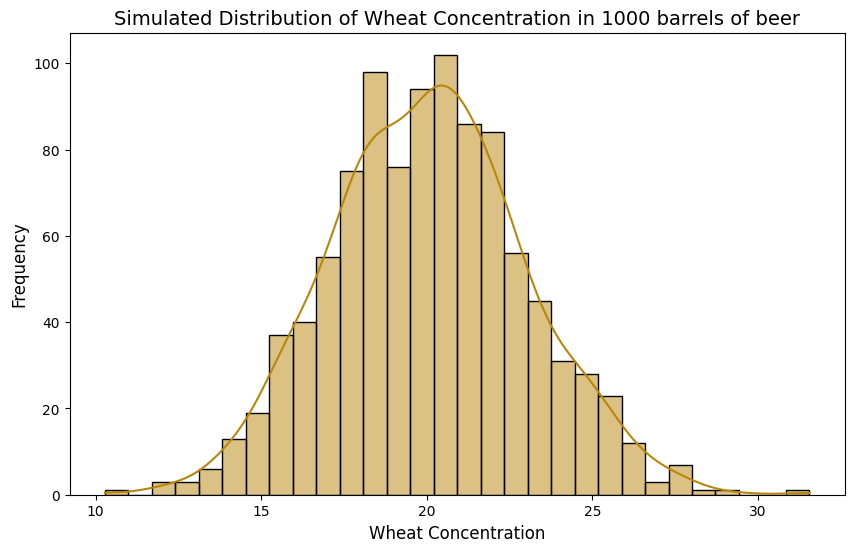

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate a normal distribution
mu, sigma = 20, 3  # mean and standard deviation of the underlying normal distribution
population_simulated = np.random.normal(mu, sigma, 1000)  # Generate 1000 samples

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(population_simulated, kde=True, color='darkgoldenrod', bins=30)
plt.title('Simulated Distribution of Wheat Concentration in 1000 barrels of beer', fontsize=14)
plt.xlabel('Wheat Concentration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [ ]:
# Define the sample_and_mean function as given
def sample_and_mean(population, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, sample_size)  # Randomly sample from the population
        sample_means.append(np.mean(sample))  # Calculate the mean and store
    return sample_means

In [ ]:
# Parameters for sampling
sample_size_1 = 3  # Size of each sample
sample_size_2 = 13  # Size of each sample
sample_size_3 = 23  # Size of each sample
sample_size_4 = 33  # Size of each sample
num_samples = 20000  # Number of samples to draw


# Generate the sampling distributions
means_sampling_1 = sample_and_mean(population_simulated, sample_size_1, num_samples)
means_sampling_2 = sample_and_mean(population_simulated, sample_size_2, num_samples)
means_sampling_3 = sample_and_mean(population_simulated, sample_size_3, num_samples)
means_sampling_4 = sample_and_mean(population_simulated, sample_size_4, num_samples)

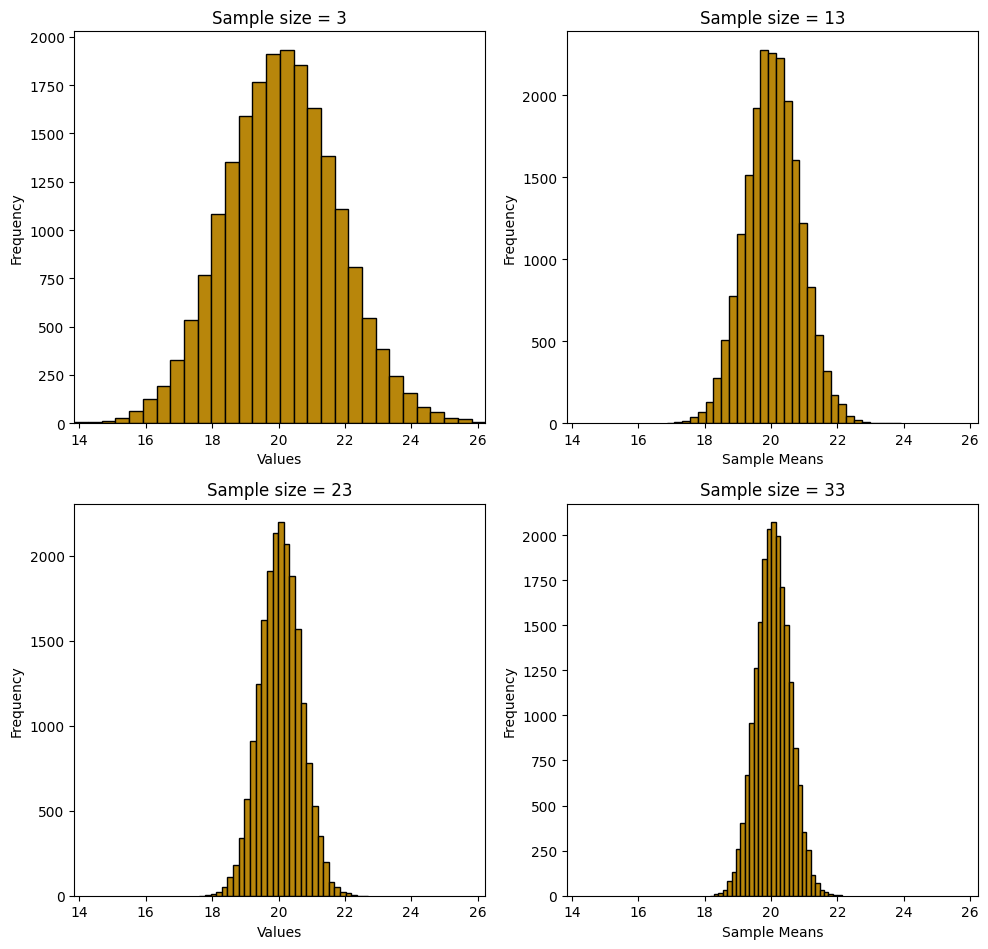

In [ ]:
# Determine a common x-axis range for all histograms
x_min = min(min(means_sampling_1), min(means_sampling_2), min(means_sampling_3), min(means_sampling_4))
x_max = max(max(means_sampling_1), max(means_sampling_2), max(means_sampling_3), max(means_sampling_4))

# Set up the plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original population distribution (top left)
axs[0, 0].hist(means_sampling_1, bins=30, color='darkgoldenrod', edgecolor='black')
axs[0, 0].set_title(f'Sample size = {sample_size_1}')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlim(x_min, x_max)  # Set the same x-axis limits

# Sampling distribution (top right)
axs[0, 1].hist(means_sampling_2, bins=30, color='darkgoldenrod', edgecolor='black')
axs[0, 1].set_title(f'Sample size = {sample_size_2}')
axs[0, 1].set_xlabel('Sample Means')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlim(x_min, x_max)  # Set the same x-axis limits

# Original population distribution (bottom left)
axs[1, 0].hist(means_sampling_3, bins=30, color='darkgoldenrod', edgecolor='black')
axs[1, 0].set_title(f'Sample size = {sample_size_3}')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlim(x_min, x_max)  # Set the same x-axis limits

# Sampling distribution (bottom right)
axs[1, 1].hist(means_sampling_4, bins=30, color='darkgoldenrod', edgecolor='black')
axs[1, 1].set_title(f'Sample size = {sample_size_4}')
axs[1, 1].set_xlabel('Sample Means')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_xlim(x_min, x_max)  # Set the same x-axis limits

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()


### Z Distribution

Imagine you are measuring heights of people from the Netherlands and people from Laos. Both are normally distributed.

Now imagine you are given the heigts of two persons, one from Netherlands and one from Laos.

You are asked "Which is the most extreme?"

To achieve this, you must use the standard normal (substracting the mean and dividing by the standard deviation of each population). In this way, each height becomes a ratio of its distance from the mean/mean distance ("This person is X chunks of typical variation away from the average" or "This person has a distance that is X times bigger/smaller than the mean distance)

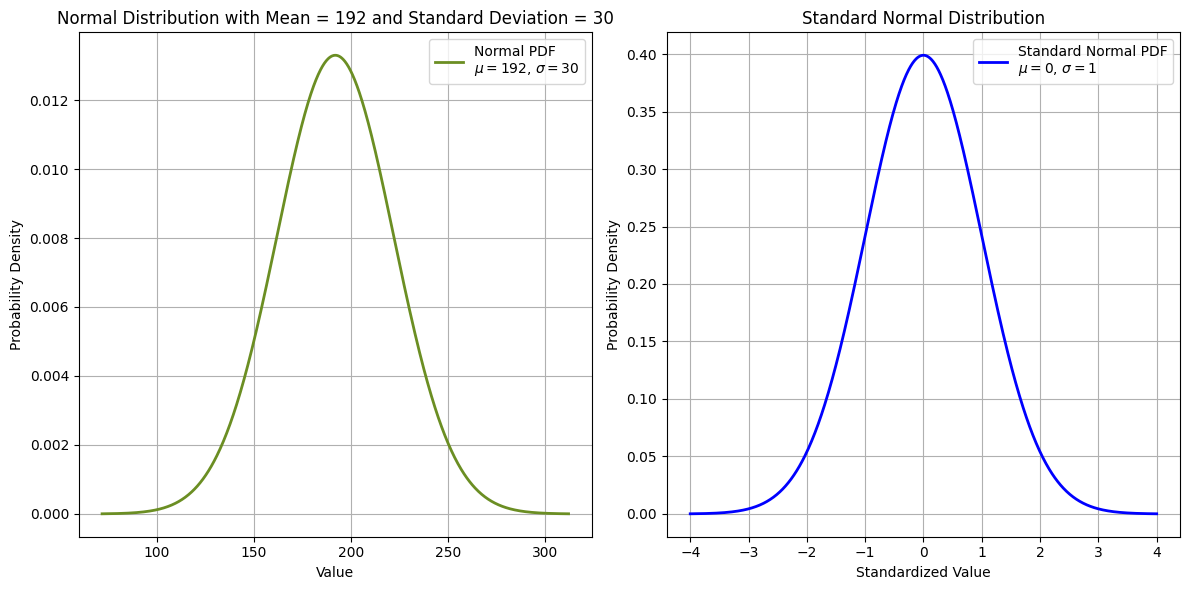

In [ ]:

# Parameters for the normal distribution
mu = 192      # Mean of the normal distribution
sigma = 30    # Standard deviation of the normal distribution

# Create an array of values from mean - 4*sigma to mean + 4*sigma
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Compute the PDF for the normal distribution
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Standardize the values
x_standardized = (x - mu) / sigma

# Compute the PDF for the standard normal distribution
pdf_standardized = norm.pdf(x_standardized)

# Plot the PDF of the original normal distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, pdf, 'olivedrab', lw=2, label=f'Normal PDF\n$\mu={mu}$, $\sigma={sigma}$')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title(f'Normal Distribution with Mean = {mu} and Standard Deviation = {sigma}')
plt.legend(loc='upper right')
plt.grid(True)

# Plot the PDF of the standard normal distribution
plt.subplot(1, 2, 2)
plt.plot(x_standardized, pdf_standardized, 'b-', lw=2, label='Standard Normal PDF\n$\mu=0$, $\sigma=1$')
plt.xlabel('Standardized Value')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


#### **Where 95% lives**

In a standard normal, 95% of the data lies between -1.96 +1.96 tyipical standard deviations.

"Typical" in the sense that this applies for any normal distribution regardless of mean/std

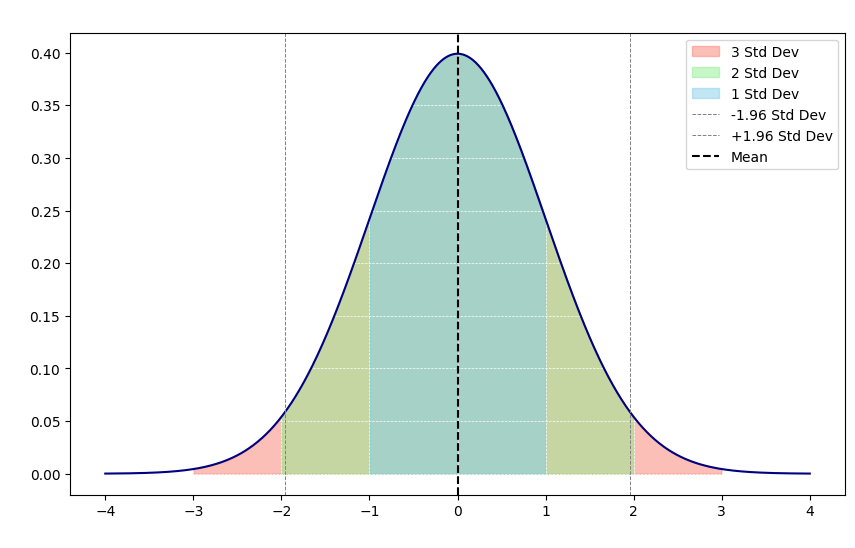

In [ ]:
# Generate x values
x = np.linspace(-4, 4, 1000)  # 1000 points between -4 and 4

# Calculate the probability density function (PDF) of the normal distribution
y = norm.pdf(x, 0, 1)  # mean = 0, standard deviation = 1

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='navy')

# Highlight standard deviations with new colors
mean = 0
std_dev = 1

# Three standard deviations
plt.fill_between(x, y, where=(x > mean - 3*std_dev) & (x < mean + 3*std_dev), color='salmon', alpha=0.5, label="3 Std Dev")

# Two standard deviations
plt.fill_between(x, y, where=(x > mean - 2*std_dev) & (x < mean + 2*std_dev), color='lightgreen', alpha=0.5, label="2 Std Dev")

# One standard deviation
plt.fill_between(x, y, where=(x > mean - std_dev) & (x < mean + std_dev), color='skyblue', alpha=0.5, label="1 Std Dev")



# Customize the plot
plt.title("Standard Normal Distribution with Standard Deviations", fontsize=14, color='white')
plt.xlabel("X", color='white')
plt.ylabel("Probability Density", color='white')
plt.axvline(mean - 1.96*std_dev, color='gray', linestyle='--', linewidth=0.7, label="-1.96 Std Dev")
plt.axvline(mean + 1.96*std_dev, color='gray', linestyle='--', linewidth=0.7, label="+1.96 Std Dev")
plt.axvline(mean, color='black', linestyle='--', label="Mean")
plt.legend()
plt.grid(True, color='white', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


### Central chi-square distribution

The central chi-square distribution arises as we add the square of standard normal variables

It depends on only one parameter (df): the number of standard normals that we square and add.

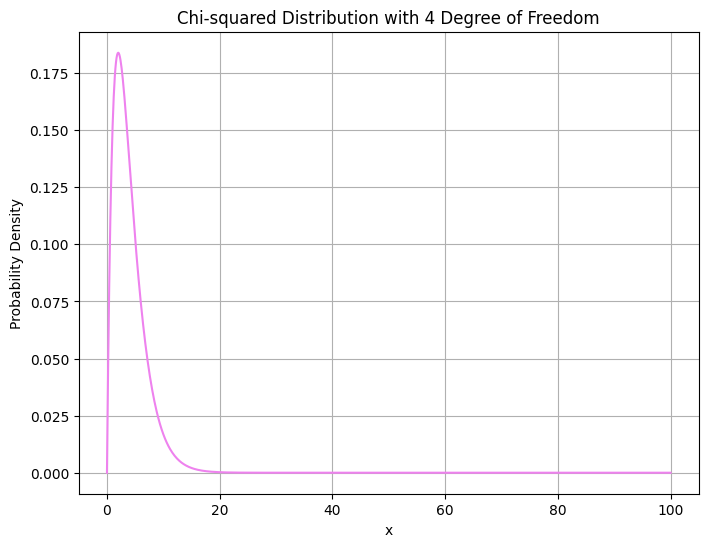

In [ ]:
# Step 1: Define the degrees of freedom
df = 4  # Degrees of freedom (1 for your case)
x = np.linspace(0, 100, 1000)  # Generate x values for the plot

# Step 2: Compute the chi-squared probability density function (PDF)
pdf = chi2.pdf(x, df)

# Step 3: Plot the chi-squared distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Chi-squared Distribution (df={df})', color='violet')

# Step 4: Add plot labels and title
plt.title(r'Chi-squared Distribution with 4 Degree of Freedom')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


#### **Relationship with Gamma (intuition)**

Gamma distribution: Models how many units of time/space/etc. accumulate **until** a treshold is reached (the occurrence of the x-th event)

Chi-square distribution: Models how many squared deviations from the mean(distance units) accumulate **up to** a treshold (until the addition of the xth squared deviation)

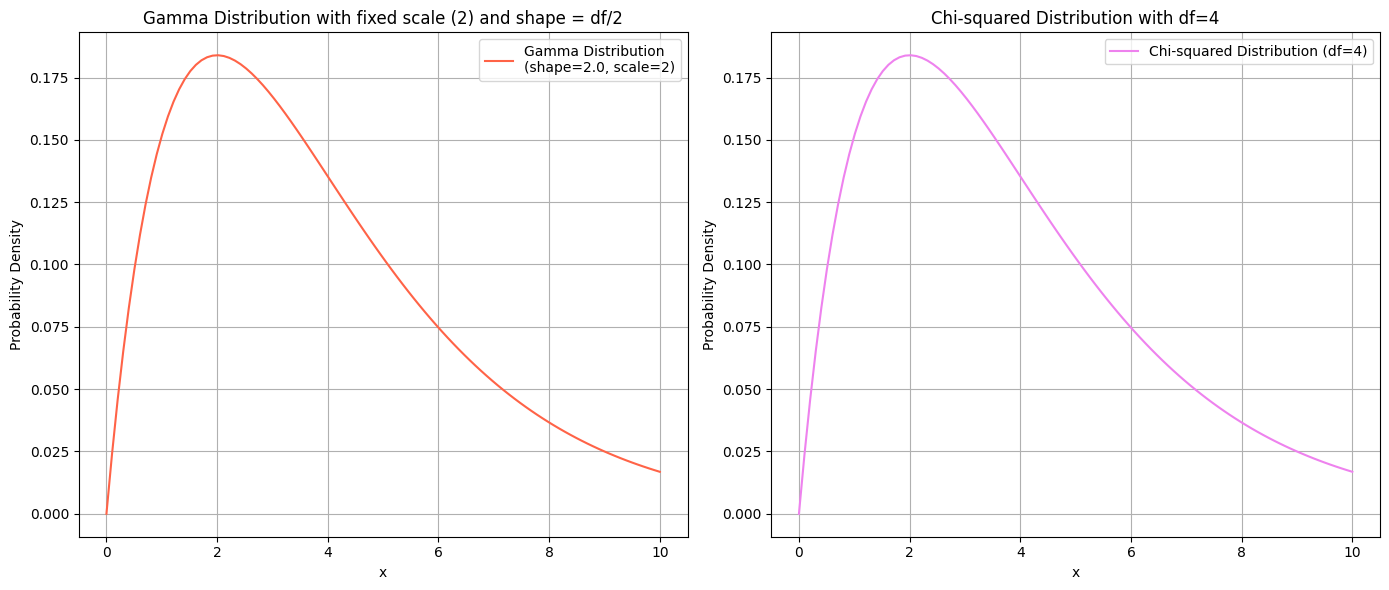

In [ ]:
# Step 1: chisquare
df = 4  #
x_chi2 = np.linspace(0, 10, 100)  # Generate x values for the plot
pdf_chi2 = chi2.pdf(x_chi2, df)

# Step 2: Define gamma
shape = df/2  # Shape parameter (k) number of kth events
scale = 2 # Scale parameter (theta) 1/Rate
x_gamma = np.linspace(0, 10, 100)  # Range of x values
pdf_gamma = gamma.pdf(x_gamma, a=shape, scale=scale)


# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Gamma distribution on the first subplot
ax1.plot(x_gamma, pdf_gamma, 'tomato', label=f'Gamma Distribution\n(shape={shape}, scale={round(scale, 2)})')
ax1.set_title(f'Gamma Distribution with fixed scale (2) and shape = df/2')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.legend()
ax1.grid(True)

# Plot Chi-squared distribution on the second subplot
ax2.plot(x_chi2, pdf_chi2, label=f'Chi-squared Distribution (df={df})', color='violet')
ax2.set_title(f'Chi-squared Distribution with df={df}')
ax2.set_xlabel('x')
ax2.set_ylabel('Probability Density')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



#### **Demonstration using the sampling distribution of sample variance**

Notice that when the sample variance is used as an estimator for the population variance, its distribution is approximately central chi-square only if the underlying population is standard normal.

In [ ]:
# Create three different populations with different distributions
np.random.seed(42)  # For reproducibility

# Population 1: Uniform Distribution
population_uniform = np.random.uniform(5, 20, 10000)

# Population 2: Standard Normal Distribution
population_normal_standard = np.random.normal(0, 1, 10000)

# Population 3: Normal Distribution
population_normal = np.random.normal(8, 1.5, 10000)

# Population 4: Exponential Distribution
population_exponential = np.random.exponential(5, 10000)

In [ ]:
# Define the sample_and_std function
def sample_and_var(population, sample_size, num_samples):
    sample_vars = []
    for _ in range(num_samples):
        sample = np.random.choice(population, sample_size)  # Randomly sample from the population
        sample_variance = np.var(sample, ddof=1)  # Calculate the sample var and store
        sample_vars.append(sample_variance * (sample_size - 1))
    return sample_vars

In [ ]:
# Parameters for sampling
sample_size = 5  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Generate the sampling distributions
var_uniform = sample_and_var(population_uniform, sample_size, num_samples)
var_standard_normal = sample_and_var(population_normal_standard, sample_size, num_samples)
var_normal = sample_and_var(population_normal, sample_size, num_samples)
var_exponential = sample_and_var(population_exponential, sample_size, num_samples)

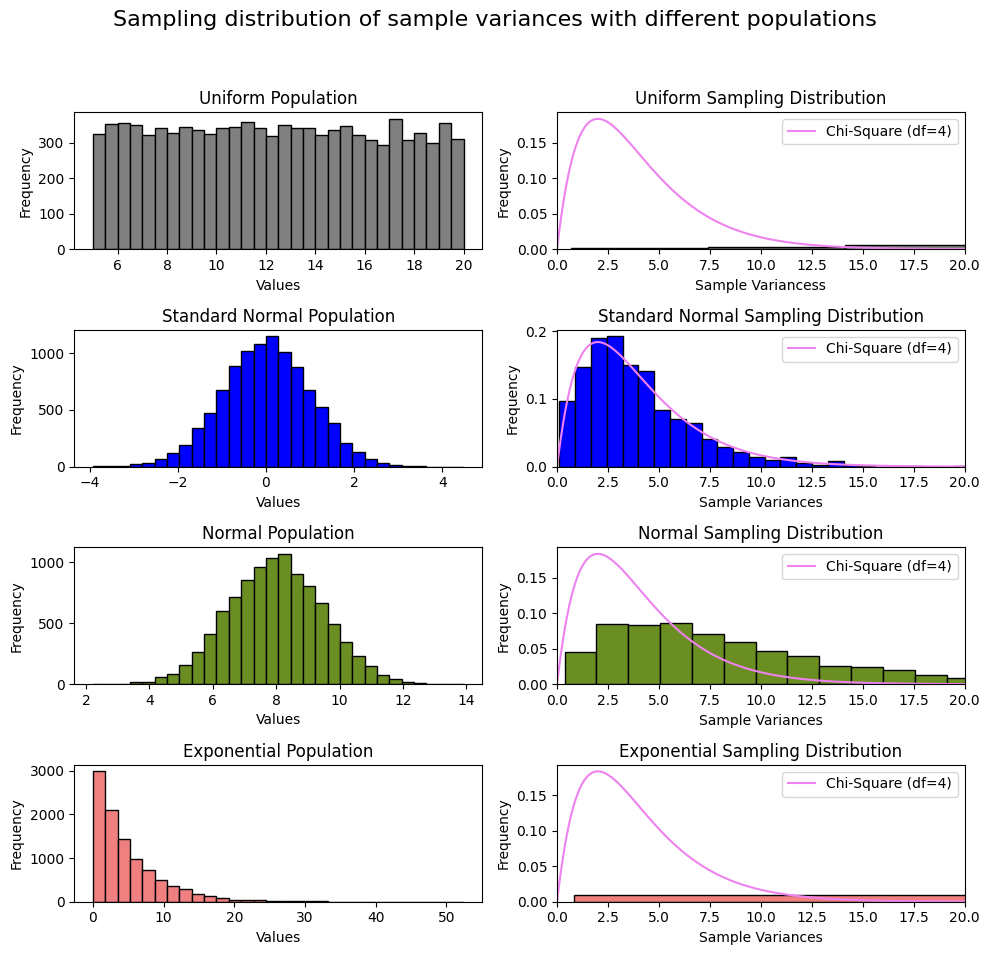

In [ ]:
# Set up the plots
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
fig.suptitle('Sampling distribution of sample variances with different populations', fontsize=16)


# Plot for Uniform Distribution
# Original population distribution (top)
axs[0, 0].hist(population_uniform, bins=30, color='grey', edgecolor='black')
axs[0, 0].set_title('Uniform Population')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Frequency')

# Sampling distribution (bottom)
axs[0, 1].hist(var_uniform, bins=30, color='grey', edgecolor='black',density=True)
axs[0, 1].set_title('Uniform Sampling Distribution')
axs[0, 1].set_xlabel('Sample Variancess')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlim(0, 20)
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df=4)  # Chi-square PDF with 3 degrees of freedom
axs[0, 1].plot(x, y, color='violet', label='Chi-Square (df=4)')
axs[0, 1].legend()

# Plot for Standard Normal Distribution
# Original population distribution (top)
axs[1, 0].hist(population_normal_standard, bins=30, color='blue', edgecolor='black')
axs[1, 0].set_title('Standard Normal Population')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Frequency')


# Sampling distribution (bottom)
axs[1, 1].hist(var_standard_normal, bins=30, color='blue', edgecolor='black',density=True)
axs[1, 1].set_title('Standard Normal Sampling Distribution')
axs[1, 1].set_xlabel('Sample Variances')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_xlim(0, 20)
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df=4)  # Chi-square PDF with 3 degrees of freedom
axs[1, 1].plot(x, y, color='violet', label='Chi-Square (df=4)')
axs[1, 1].legend()


# Plot for Normal Distribution
# Original population distribution (top)
axs[2, 0].hist(population_normal, bins=30, color='olivedrab', edgecolor='black')
axs[2, 0].set_title('Normal Population')
axs[2, 0].set_xlabel('Values')
axs[2, 0].set_ylabel('Frequency')


# Sampling distribution (bottom)
axs[2, 1].hist(var_normal, bins=30, color='olivedrab', edgecolor='black',density=True)
axs[2, 1].set_title('Normal Sampling Distribution')
axs[2, 1].set_xlabel('Sample Variances')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].set_xlim(0, 20)
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df=4)  # Chi-square PDF with 3 degrees of freedom
axs[2, 1].plot(x, y, color='violet', label='Chi-Square (df=4)')
axs[2, 1].legend()

# Plot for Exponential Distribution
# Original population distribution (top)
axs[3, 0].hist(population_exponential, bins=30, color='lightcoral', edgecolor='black')
axs[3, 0].set_title('Exponential Population')
axs[3, 0].set_xlabel('Values')
axs[3, 0].set_ylabel('Frequency')

# Sampling distribution (bottom)
axs[3, 1].hist(var_exponential, bins=30, color='lightcoral', edgecolor='black',density=True)
axs[3, 1].set_title('Exponential Sampling Distribution')
axs[3, 1].set_xlabel('Sample Variances')
axs[3, 1].set_ylabel('Frequency')
axs[3, 1].set_xlim(0, 20)
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df=4)  # Chi-square PDF with 3 degrees of freedom
axs[3, 1].plot(x, y, color='violet', label='Chi-Square (df=4)')
axs[3, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### T Distribution

It is a generalization of the standard normal distribution that accounts for using the sample variance as an estimate of population variance.

The distribution depends on only one parameter, degrees of freedom (df).

What df means: https://journals.sagepub.com/doi/full/10.1177/2515245919882050

Df = n(sample size) - 1

As df increases, the distribution approaches the standard normal (Z).

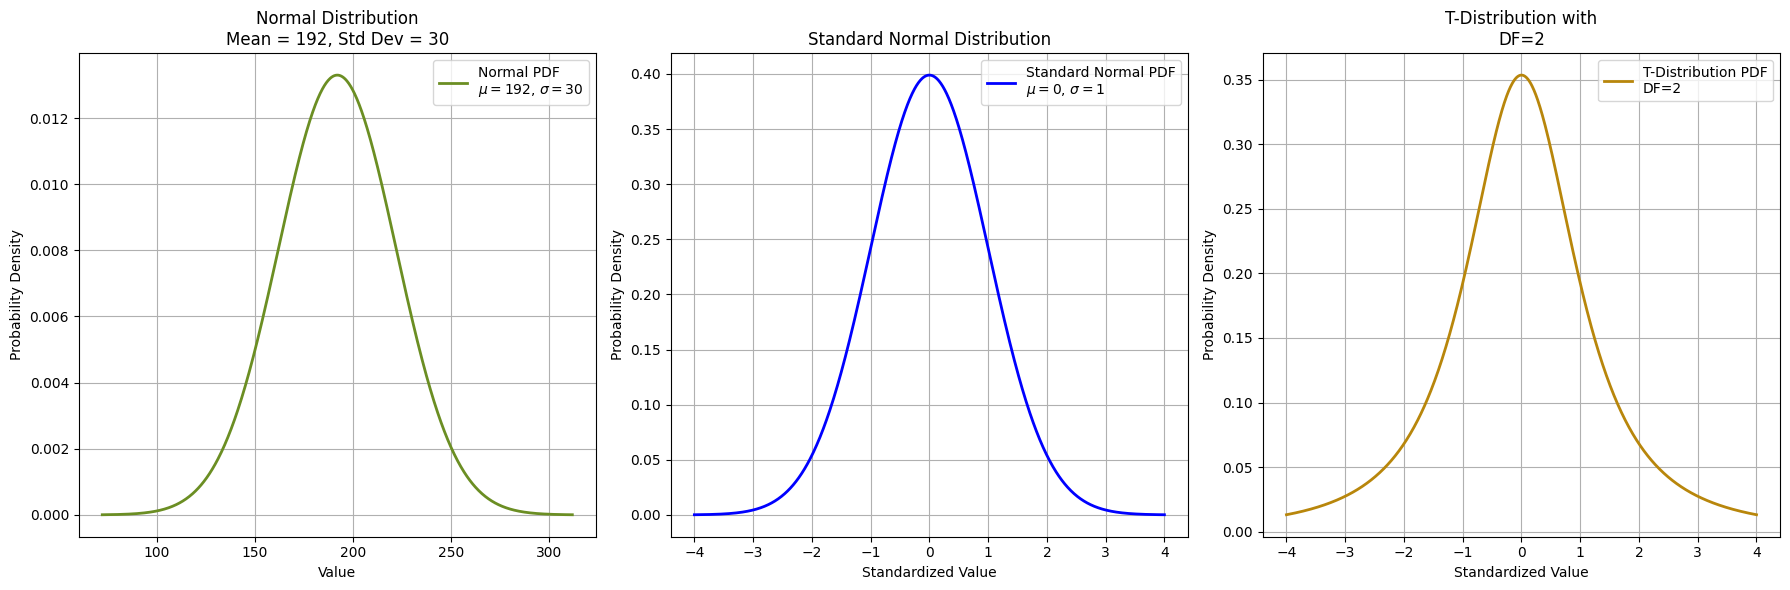

In [ ]:
# Parameters for the normal distribution
mu = 192      # Mean of the normal distribution
sigma = 30    # Standard deviation of the normal distribution

# Parameters for the t-distribution
n = 3        # Sample size
df = n - 1    # Degrees of freedom

# Create an array of values from mean - 4*sigma to mean + 4*sigma
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Compute the PDF for the normal distribution
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Standardize the values
x_standardized = (x - mu) / sigma

# Compute the PDF for the standard normal distribution
pdf_standardized = norm.pdf(x_standardized)

# Compute the PDF for the t-distribution
pdf_t = t.pdf(x_standardized, df)

# Plot the PDFs
plt.figure(figsize=(18, 6))

# Plot the PDF of the original normal distribution
plt.subplot(1, 3, 1)
plt.plot(x, pdf, 'olivedrab', lw=2, label=f'Normal PDF\n$\mu={mu}$, $\sigma={sigma}$')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title(f'Normal Distribution\nMean = {mu}, Std Dev = {sigma}')
plt.legend(loc='upper right')
plt.grid(True)

# Plot the PDF of the standard normal distribution
plt.subplot(1, 3, 2)
plt.plot(x_standardized, pdf_standardized, 'b-', lw=2, label='Standard Normal PDF\n$\mu=0$, $\sigma=1$')
plt.xlabel('Standardized Value')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')
plt.legend(loc='upper right')
plt.grid(True)

# Plot the PDF of the t-distribution
plt.subplot(1, 3, 3)
plt.plot(x_standardized, pdf_t, 'darkgoldenrod', lw=2, label=f'T-Distribution PDF\nDF={df}')
plt.xlabel('Standardized Value')
plt.ylabel('Probability Density')
plt.title(f'T-Distribution with\nDF={df}')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


#### **Relationship with chi-square (intuition)**

The t-distribution is a ratio of a standard normal distribution to a (scaled and square-rooted) chi-square distribution.

In this sense, the t-distribution represents the ratio of the sampling distribution of the sample mean (when drawn from a normal distribution or via the Central Limit Theorem) to the sampling distribution of the sample variance (a chi-square distribution).

When the sample size is small, the t-distribution resembles a normal distribution but with more extreme cases, due to the skewed shape of the chi-square distribution in the denominator.

As the sample size increases, the t-distribution increasingly resembles a normal distribution because the chi-square distribution approaches normality as
n approaches infinity.

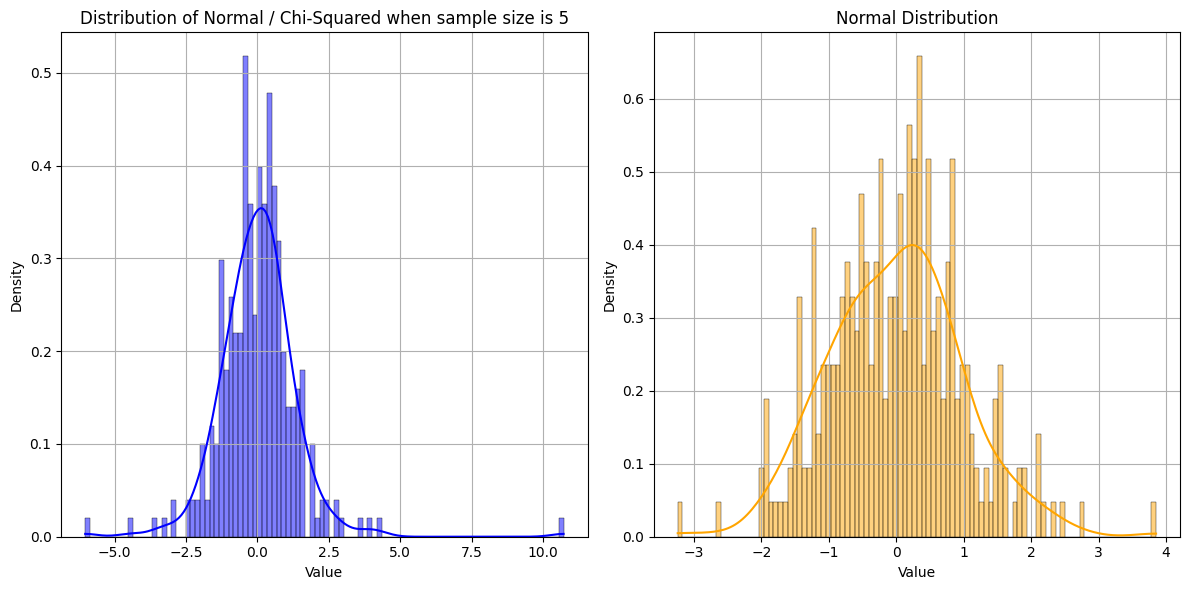

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate samples
n_samples = 300
df=5
normal_samples = np.random.normal(loc=0, scale=1, size=n_samples)  # Standard normal distribution
chi_squared_samples = np.random.chisquare(df=df, size=n_samples)      # Chi-square distribution
# Avoid division by zero
chi_squared_samples += 1e-10  # Small constant to prevent division by zero

# Perform the division
resulting_distribution = normal_samples / (np.sqrt(chi_squared_samples/df))

# Set up the figure
plt.figure(figsize=(12, 6))

# Plotting the resulting distribution
plt.subplot(1, 2, 1)
sns.histplot(resulting_distribution, bins=100, kde=True, stat='density', color='blue')
plt.title('Distribution of Normal / Chi-Squared when sample size is 5')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()

# Plotting the normal distribution
plt.subplot(1, 2, 2)
sns.histplot(normal_samples, bins=100, kde=True, stat='density', color='orange')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

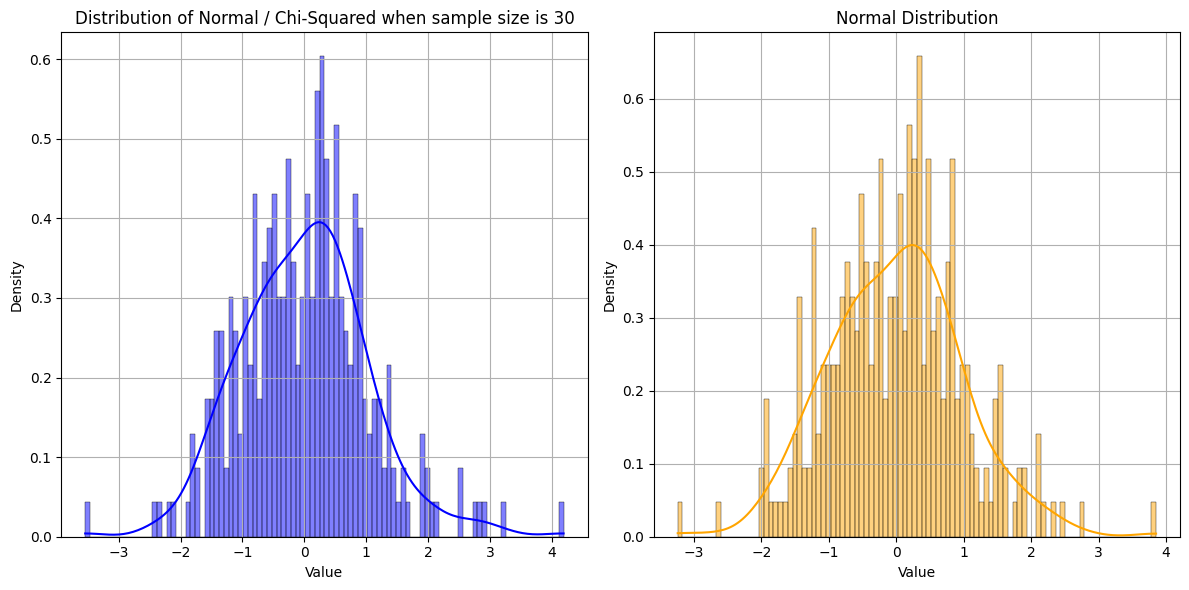

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate samples
n_samples = 300
df=30
normal_samples = np.random.normal(loc=0, scale=1, size=n_samples)  # Normal distribution
chi_squared_samples = np.random.chisquare(df=df, size=n_samples)      # increase sample size form here by increasing df

# Avoid division by zero
chi_squared_samples += 1e-10  # Small constant to prevent division by zero

# Perform the division
resulting_distribution = normal_samples / (np.sqrt(chi_squared_samples/df))
# Set up the figure
plt.figure(figsize=(12, 6))

# Plotting the resulting distribution
plt.subplot(1, 2, 1)
sns.histplot(resulting_distribution, bins=100, kde=True, stat='density', color='blue')
plt.title('Distribution of Normal / Chi-Squared when sample size is 30')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()

# Plotting the normal distribution
plt.subplot(1, 2, 2)
sns.histplot(normal_samples, bins=100, kde=True, stat='density', color='orange')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

### F distribution

The F-distribution arises as the ratio of two chi-square distributions.

It depends on two parameters (df1 and df2): the degrees of freedom for the chi-square distribution in the numerator (which is the sum of the squares of a certain number of standard normal variables) and the degrees of freedom for the chi-square distribution in the denominator (which is similarly the sum of the squares of a different number of standard normal variables).

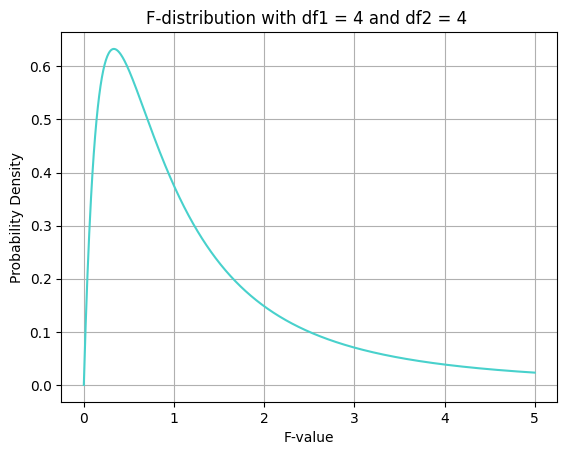

In [ ]:
# Define the degrees of freedom for the numerator (dfn) and denominator (dfd)
dfn = 4  # degrees of freedom for the numerator
dfd = 4  # degrees of freedom for the denominator

# Generate random values from the F-distribution
f_values = np.linspace(0, 5, 1000)  # Values on x-axis
pdf_values = f.pdf(f_values, dfn, dfd)  # Calculate PDF for these x-values

# Plot the PDF of F-distribution
plt.plot(f_values, pdf_values, label=f'F-distribution (dfn={dfn}, dfd={dfd})', color='mediumturquoise')
plt.title(f'F-distribution with df1 = {dfn} and df2 = {dfd} ')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()